 # 1) Delivery_time -> Predict delivery time using sorting time 

  * Build a simple linear regression model by performing EDA and do necessary transformations 
  * and select the best model using R or Python.

In [108]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Import dataset

In [109]:
delivery=pd.read_csv("D:\\Sandesh\\Data Science\\Homework Assignment\\Regression\\Simple Linear Regression\\delivery_time.csv",encoding='latin1')
delivery.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


# Independent variable(x) - Sorting Time , Target variable(y) - Delivery time

# EDA and Visualization

In [110]:
delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [111]:
np.round(delivery.describe(),2)

,Delivery Time,Sorting Time
count,21.00,21.00
mean,16.79,6.19
std,5.07,2.54
min,8.00,2.00
25%,13.50,4.00
50%,17.83,6.00
75%,19.75,8.00
max,29.00,10.00


In [112]:
delivery.dtypes

Delivery Time    float64
Sorting Time       int64
dtype: object

In [113]:
delivery.shape

(21, 2)

In [114]:
# Check for null values

delivery.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

# Renaming Columns

In [115]:
delivery=delivery.rename({'Delivery Time':'delivery_time', 'Sorting Time':'sorting_time'},axis=1)
delivery

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


<AxesSubplot:xlabel='delivery_time', ylabel='Density'>

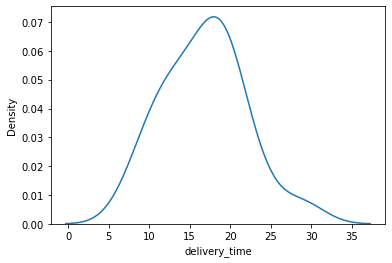

In [116]:
# Draw Distribution plot to check whether the values follow normal distribution or not.

sns.distplot(delivery['delivery_time'],hist=False)

# the graph is not normally distributed.

In [117]:
delivery['delivery_time'].skew()
# positive skewness .

0.3523900822831107

In [118]:
delivery['delivery_time'].kurtosis()

# as the value is less than 3 , there is less no of outliers.

0.31795982942685397

<AxesSubplot:xlabel='sorting_time', ylabel='Density'>

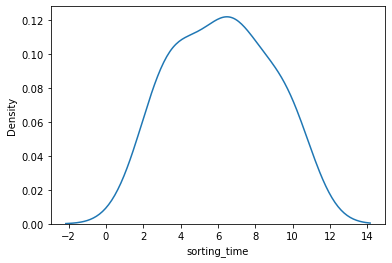

In [119]:
sns.distplot(delivery['sorting_time'],hist=False)

In [120]:
delivery['sorting_time'].skew()
# positive skewness .

0.047115474210530174

In [121]:
delivery['sorting_time'].kurtosis()
# as the value is less than 3 , there is less no of outliers.

-1.14845514534878

<AxesSubplot:xlabel='delivery_time'>

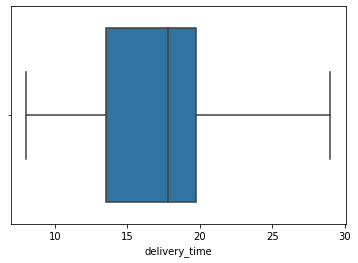

In [122]:
# Draw Box plot to check whether there is any outliers are available or not.

sns.boxplot(delivery['delivery_time'])

# There is no outliers available

<AxesSubplot:xlabel='sorting_time'>

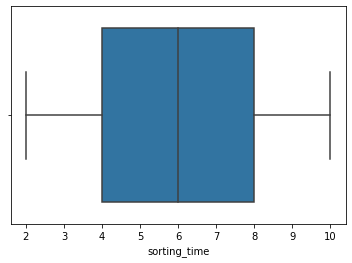

In [123]:
sns.boxplot(delivery['sorting_time'])
# There is no outliers available

In [127]:
# Correlation Analysis

delivery.corr()

# From table we can say that delivery_time and sorting_time are positively correlated , near to 1.
# +1  -  highly correlated(Positive association) , -1 = Highly Correlated(Negative association), 
# both indicated perfect linear relationship
# if delivery_time increases sorting_time also increases.
# 0.80 - 1.0 = Strong Correlation.

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


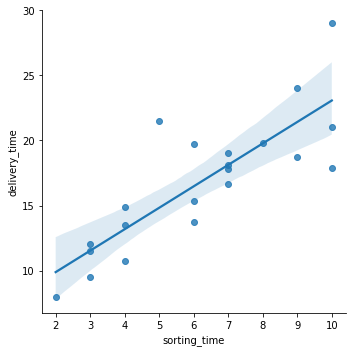

In [131]:
sns.lmplot(x='sorting_time',y='delivery_time',data=delivery)

# Drawn Line plot to check the Linearity test.
# From the pot below ,many data points are not falling onto the linear line 


In [132]:

# Standardized the independent values 

data=delivery[['sorting_time']]
y=delivery[['delivery_time']]
std_scaler=StandardScaler()
X_Scaled=std_scaler.fit_transform(data)
X_Scaled=pd.DataFrame(data=X_Scaled,columns=data.columns)
X_Scaled
delivery=pd.concat([X_Scaled,y],axis=1)
delivery

,sorting_time,delivery_time
0,1.535625,21.00
1,-0.882984,13.50
2,-0.076781,19.75
3,1.132523,24.00
4,1.535625,29.00
5,-0.076781,15.35
6,0.326320,19.00
7,-1.286086,9.50
8,1.535625,17.90
9,1.132523,18.75


# Building Simple Linear Regression Model

In [133]:
model=smf.ols("delivery_time~sorting_time",data=delivery).fit()

# Model Testing

In [134]:
# Finding Coefficient parameters (Slope and Sorting_time)
# Intercept = Slope

model.params


Intercept       16.790952
sorting_time     4.090831
dtype: float64

In [135]:
# Finding tvalues and pvalues
np.round(model.tvalues) , np.round(model.pvalues)

(Intercept       26.0
 sorting_time     6.0
 dtype: float64,
 Intercept       0.0
 sorting_time    0.0
 dtype: float64)

In [136]:
# Finding Rsquared Values
model.rsquared , model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

# Manual Model Predictions

In [148]:
# Manual prediction for say sorting time 5
# Equation of line : y = mx+c   
delivery_time = (16.790952) + (4.090831)*(5)
delivery_time

78.15341699999999

In [142]:
# Manual prediction for say sorting time 15
delivery_time = (16.790952) + (4.090831)*(15)
delivery_time

31.318033999999997

In [143]:
# Manual prediction for say sorting time 12
delivery_time = (16.790952) + (4.090831)*(12)
delivery_time

26.370973999999997

# Predict for new data points

In [144]:
# Automatic Prediction for say sorting time 12, 15
new_data=pd.Series([12,15])
new_data

0    12
1    15
dtype: int64

In [145]:
data_pred=pd.DataFrame(new_data,columns=['sorting_time'])
data_pred

,sorting_time
0,12
1,15


In [146]:
model.predict(data_pred)

0    65.880923
1    78.153415
dtype: float64

  # 2) Salary_hike -> Build a prediction model for Salary_hike

In [155]:
# impoort libraries
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler

In [156]:
# import dataset
salary=pd.read_csv("D:\\Sandesh\\Data Science\\Homework Assignment\\Regression\\Simple Linear Regression\\Salary_Data.csv")
salary.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


# Independent variable -  Experience(x) , Target variable - Salary (y)

# EDA 

In [157]:
salary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 608.0 bytes


In [158]:
salary.dtypes

YearsExperience    float64
Salary               int64
dtype: object

In [159]:
salary.shape

(30, 2)

In [160]:
salary.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

# Visualizations

<AxesSubplot:xlabel='Salary', ylabel='Density'>

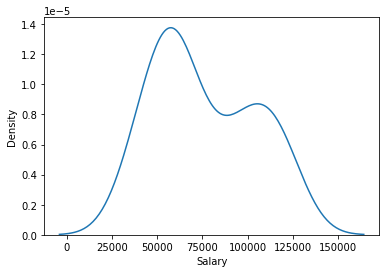

In [161]:
sns.distplot(salary['Salary'],hist=False)
# the data is not normally distributed.

In [162]:
salary['Salary'].skew()

0.35411967922959153

In [163]:
salary['Salary'].kurtosis()

-1.295421086394517

<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

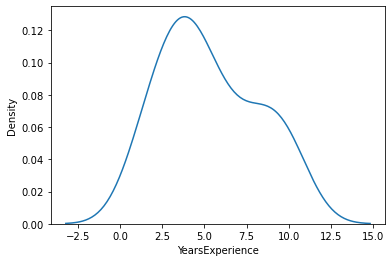

In [164]:
sns.distplot(salary['YearsExperience'],hist=False)
# the data is not normally distributed.

In [165]:
salary['YearsExperience'].skew()

0.37956024064804106

In [166]:
salary['YearsExperience'].kurtosis()

-1.0122119403325072

<AxesSubplot:xlabel='YearsExperience'>

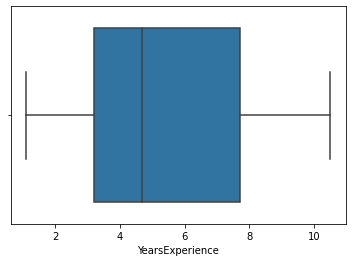

In [167]:
sns.boxplot(salary['YearsExperience'])
# There is no outliers available

<AxesSubplot:xlabel='Salary'>

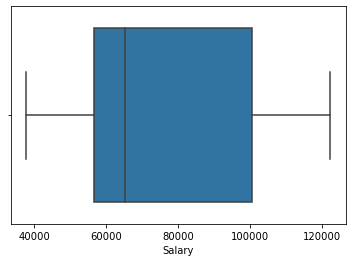

In [168]:
sns.boxplot(salary['Salary'])
# There is no outliers available

# Correlation Analysis

In [169]:
salary.corr()

# Below figure show the correction between salary and experince and it is highly correlated as it is near to 1.
# if salary increases , experince also increases and vice-versa.

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

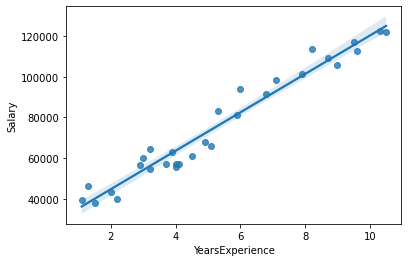

In [170]:
sns.regplot(x=salary['YearsExperience'],y=salary['Salary'])

# Drawn Line plot to check the Linearity test.
# From the pot below ,many data points are not falling onto the linear line 

# Applying StandardScalar

In [177]:
x=salary[['YearsExperience']]
y=salary[['Salary']]
std_scaler=StandardScaler()
X_Scaled=std_scaler.fit_transform(x)
X_Scaled=pd.DataFrame(data=X_Scaled,columns=x.columns)
X_Scaled
salary=pd.concat([X_Scaled,y],axis=1)
salary

,YearsExperience,Salary
0,-1.510053,39343
1,-1.438373,46205
2,-1.366693,37731
3,-1.187494,43525
4,-1.115814,39891
5,-0.864935,56642
6,-0.829096,60150
7,-0.757416,54445
8,-0.757416,64445
9,-0.578216,57189


# Fitting a Linear Regression Model

In [178]:
# model = smf.ols("y~x",data=defined_data).fit()   ; ols= ordinary least square method

model=smf.ols("Salary~YearsExperience",data=salary).fit()

# Model Testing

In [179]:
# as Y = Beta0 + Beta1*(X)
# Finding Coefficient Parameters (Beta0 and Beta1 values)
# Here, (Intercept) Beta0 value = 25792.200 & (YearsExperience) Beta1 value = 9449.96

model.params

Intercept          76003.000000
YearsExperience    26367.182444
dtype: float64

In [180]:
# (Intercept) Beta0:  
# (daily)     Beta1:  
# As (pvalue=0)<(α=0.05); Reject Null hyp . Thus, X(yearsexperience) variable has good slope 
# and variance w.r.t Y(salary) variable. 

print(model.tvalues ,'\n', model.pvalues)


Intercept          71.918265
YearsExperience    24.950094
dtype: float64 
 Intercept          2.579093e-33
YearsExperience    1.143068e-20
dtype: float64


In [181]:
# R-squared measures the strength of the relationship between your model and the dependent variable on a 0 – 100% scale.

# Determination Coefficient = rsquared value = 0.9554 ; very good fit = 95.54%


model.rsquared ,model.rsquared_adj

(0.9569566641435086, 0.9554194021486339)

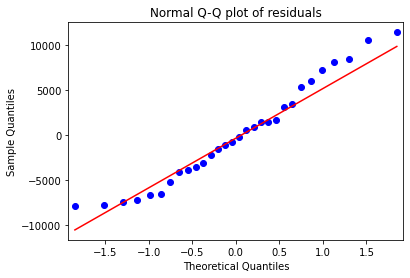

In [182]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
qqplot=sm.qqplot(model.resid,line='q') 
plt.title("Normal Q-Q plot of residuals")
plt.show()

# Manual Model Prediction

In [188]:
# Manual prediction for say 5 Years Experience
# y = mx+c
Salary = (76003.000000) + (26367.182444)*(5)
Salary

207838.91222

In [189]:
# For Experience - 6 
Salary = (76003.000000) + (26367.182444)*(6)
Salary

234206.09466399997

# Predict for new data points

In [197]:
new_data=pd.Series([5,6])
new_data

0    5
1    6
dtype: int64

In [198]:
data_pred=pd.DataFrame(new_data,columns=['YearsExperience'])
data_pred

,YearsExperience
0,5
1,6


In [199]:
model.predict(data_pred)

0    207838.912218
1    234206.094661
dtype: float64

#   END      ####################################